In [ ]:
pip install turicreate

In [168]:
import turicreate as tc
import numpy as np

In [169]:
sales = tc.SFrame('/content/drive/My Drive/home_data.sframe')
sales.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


In [170]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 # this is how you add a constant column to an SFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features # this is how you combine two lists
    # select the columns of data_SFrame given by the features list into the SFrame features_sframe (now including constant):
    features_sframe = tc.SFrame()
    for feature in features:
      features_sframe[feature] = data_sframe[feature]
    features_sframe
    # the following line will convert the features_SFrame into a numpy matrix:
    feature_matrix = features_sframe.to_numpy()
    # assign the column of data_sframe associated with the output to the SArray output_sarray
    output_sarray = data_sframe[output]
    # the following will convert the SArray into a numpy array by first converting it to a list
    output_array = output_sarray.to_numpy()
    return(feature_matrix, output_array)

In [171]:
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix,weights)
    return(predictions)

In [172]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if feature_is_constant == True:
      derivative = 2*np.dot(errors,feature)
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    else:
      derivative = 2*np.dot(errors,feature) + 2*l2_penalty*weight
    return derivative

To test your feature derivartive run the following:

In [173]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price') 
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights) 
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print (feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False))
print (np.sum(errors*example_features[:,1])*2+20.)


# next two lines should print the same values
print (feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print (np.sum(errors)*2.)

-56554166782350.0
-56554166782350.0
-22446749336.0
-22446749336.0


In [174]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    print ('Starting gradient descent with l2_penalty = ' + str(l2_penalty))
    
    weights = np.array(initial_weights) # make sure it's a numpy array
    iteration = 0 # iteration counter
    print_frequency = 1  # for adjusting frequency of debugging output
    
    #while not reached maximum number of iterations:
    while iteration < max_iterations:
        iteration += 1  # increment iteration counter
        ### === code section for adjusting frequency of debugging output. ===
        if iteration == 10:
            print_frequency = 10
        if iteration == 100:
            print_frequency = 100
        if iteration%print_frequency==0:
            print('Iteration = ' + str(iteration))
        ### === end code section ===
        
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        predictions = predict_output(feature_matrix,weights)
        # compute the errors as predictions - output
        errors = predictions - output
        # from time to time, print the value of the cost function
        if iteration%print_frequency==0:
            print ('Cost function = ', str(np.dot(errors,errors) + l2_penalty*(np.dot(weights,weights) - weights[0]**2)))
        
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            if i == 0:
              weight_derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty,True)
            else:
              weight_derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty,False)
            # subtract the step size times the derivative from the current weight
            weights[i] = weights[i] - step_size*weight_derivative
    print ('Done with gradient descent at iteration ', iteration)
    print ('Learned weights = ', str(weights))
    return weights

In [175]:
simple_features = ['sqft_living']
my_output = 'price'

In [176]:
train_data,test_data = sales.random_split(.8,seed=0)

In [177]:
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [178]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000


In [179]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix,output,initial_weights,step_size,0.0,max_iterations)

Starting gradient descent with l2_penalty = 0.0
Iteration = 1
Cost function =  7433051851026171.0
Iteration = 2
Cost function =  5394267213135525.0
Iteration = 3
Cost function =  4023237736501159.0
Iteration = 4
Cost function =  3101256183922414.0
Iteration = 5
Cost function =  2481247644505114.0
Iteration = 6
Cost function =  2064308077891942.0
Iteration = 7
Cost function =  1783927097372280.0
Iteration = 8
Cost function =  1595378203154871.8
Iteration = 9
Cost function =  1468583991054997.2
Iteration = 10
Cost function =  1383318191484981.8
Iteration = 20
Cost function =  1211562140496239.0
Iteration = 30
Cost function =  1208313762678823.5
Iteration = 40
Cost function =  1208252326252870.0
Iteration = 50
Cost function =  1208251163612919.5
Iteration = 60
Cost function =  1208251140915263.0
Iteration = 70
Cost function =  1208251139777036.2
Iteration = 80
Cost function =  1208251139046556.5
Iteration = 90
Cost function =  1208251138323789.5
Iteration = 100
Cost function =  1208251137

In [180]:
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix,output,initial_weights,step_size,1e11,max_iterations)

Starting gradient descent with l2_penalty = 100000000000.0
Iteration = 1
Cost function =  7433051851026171.0
Iteration = 2
Cost function =  5618303898412630.0
Iteration = 3
Cost function =  4920613278115384.0
Iteration = 4
Cost function =  4652381942612294.0
Iteration = 5
Cost function =  4549258764014156.0
Iteration = 6
Cost function =  4509612390882265.0
Iteration = 7
Cost function =  4494370050281118.0
Iteration = 8
Cost function =  4488509984030221.0
Iteration = 9
Cost function =  4486256988531769.5
Iteration = 10
Cost function =  4485390752674687.5
Iteration = 20
Cost function =  4484848868034300.0
Iteration = 30
Cost function =  4484847880479026.0
Iteration = 40
Cost function =  4484846931081657.0
Iteration = 50
Cost function =  4484845981687378.5
Iteration = 60
Cost function =  4484845032293500.0
Iteration = 70
Cost function =  4484844082900018.5
Iteration = 80
Cost function =  4484843133506937.0
Iteration = 90
Cost function =  4484842184114255.0
Iteration = 100
Cost function = 

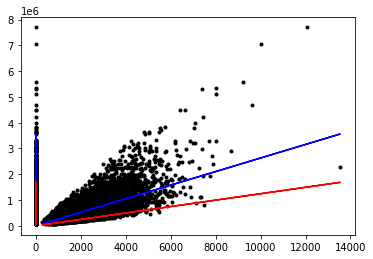

In [181]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
         simple_feature_matrix,predict_output(simple_feature_matrix,simple_weights_0_penalty),'b-',
         simple_feature_matrix,predict_output(simple_feature_matrix,simple_weights_high_penalty),'r-')

In [182]:
def RSS(feature_matrix,weights,output):
  predictions = predict_output(feature_matrix,weights)
  error = predictions - output
  value = error*error
  value_1 = value.sum()
  return value_1 



In [183]:
print(RSS(simple_test_feature_matrix,initial_weights,test_output))
print(RSS(simple_test_feature_matrix,simple_weights_0_penalty,test_output))
print(RSS(simple_test_feature_matrix,simple_weights_high_penalty,test_output))

1784273282524564.0
275723634597546.75
694642100913950.1


In [184]:
model_features = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
my_output = 'price'
(multi_feature_matrix, multi_output) = get_numpy_data(train_data, model_features, my_output)
(multi_test_feature_matrix, multi_test_output) = get_numpy_data(test_data, model_features, my_output)
initial_weights_1 = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

In [185]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(multi_feature_matrix,multi_output,initial_weights_1,step_size,0.0,max_iterations)

Starting gradient descent with l2_penalty = 0.0
Iteration = 1
Cost function =  7433051851026171.0
Iteration = 2
Cost function =  4056752331500972.5
Iteration = 3
Cost function =  2529565114333592.0
Iteration = 4
Cost function =  1838556694275926.5
Iteration = 5
Cost function =  1525675575208603.8
Iteration = 6
Cost function =  1383789498674793.5
Iteration = 7
Cost function =  1319232606276634.5
Iteration = 8
Cost function =  1289648872028921.0
Iteration = 9
Cost function =  1275884724079266.5
Iteration = 10
Cost function =  1269278807577156.5
Iteration = 20
Cost function =  1257812386316614.5
Iteration = 30
Cost function =  1251954571266786.0
Iteration = 40
Cost function =  1246755423155437.5
Iteration = 50
Cost function =  1242139508748821.0
Iteration = 60
Cost function =  1238041401137187.5
Iteration = 70
Cost function =  1234403013463993.2
Iteration = 80
Cost function =  1231172774976820.0
Iteration = 90
Cost function =  1228304900059555.0
Iteration = 100
Cost function =  1225758739

In [186]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(multi_feature_matrix,multi_output,initial_weights_1,step_size,1e11,max_iterations)

Starting gradient descent with l2_penalty = 100000000000.0
Iteration = 1
Cost function =  7433051851026171.0
Iteration = 2
Cost function =  4460489790285891.5
Iteration = 3
Cost function =  3796674468844608.0
Iteration = 4
Cost function =  3648319530437360.5
Iteration = 5
Cost function =  3615091103216102.0
Iteration = 6
Cost function =  3607602742514732.0
Iteration = 7
Cost function =  3605886322161656.0
Iteration = 8
Cost function =  3605474874533295.5
Iteration = 9
Cost function =  3605365167765576.0
Iteration = 10
Cost function =  3605329402184649.5
Iteration = 20
Cost function =  3605294281022695.0
Iteration = 30
Cost function =  3605293537267099.5
Iteration = 40
Cost function =  3605293082749905.5
Iteration = 50
Cost function =  3605292631106358.0
Iteration = 60
Cost function =  3605292179491500.5
Iteration = 70
Cost function =  3605291727877070.0
Iteration = 80
Cost function =  3605291276262784.5
Iteration = 90
Cost function =  3605290824648642.0
Iteration = 100
Cost function = 

In [187]:
print(RSS(multi_test_feature_matrix,initial_weights_1,multi_test_output))
print(RSS(multi_test_feature_matrix,multiple_weights_0_penalty,multi_test_output))
print(RSS(multi_test_feature_matrix,multiple_weights_high_penalty,multi_test_output))

1784273282524564.0
274067618287245.2
500404800579555.56


In [188]:
def predict(feature_matrix,weights):
  predictions = predict_output(feature_matrix,weights)
  print(predictions[0])
   

In [189]:
simple_test_feature_matrix

array([[1.00e+00, 1.43e+03],
       [1.00e+00, 2.95e+03],
       [1.00e+00, 1.71e+03],
       ...,
       [1.00e+00, 2.52e+03],
       [1.00e+00, 2.31e+03],
       [1.00e+00, 1.02e+03]])

In [190]:
predict(simple_test_feature_matrix,simple_weights_0_penalty)

376124.68442291836


In [191]:
predict(simple_test_feature_matrix,simple_weights_high_penalty)

178147.97847803097


In [192]:
test_data[0]

{'bathrooms': 1.0,
 'bedrooms': 3.0,
 'condition': 4,
 'constant': 1,
 'date': datetime.datetime(2014, 5, 28, 0, 0, tzinfo=GMT +0.0),
 'floors': 1.5,
 'grade': 7.0,
 'id': '0114101516',
 'lat': 47.75584254,
 'long': -122.22874498,
 'price': 310000.0,
 'sqft_above': 1430.0,
 'sqft_basement': 0.0,
 'sqft_living': 1430.0,
 'sqft_living15': 1780.0,
 'sqft_lot': 19901.0,
 'sqft_lot15': 12697.0,
 'view': 0,
 'waterfront': 0,
 'yr_built': 1927.0,
 'yr_renovated': 0.0,
 'zipcode': '98028'}

In [193]:
predict(multi_test_feature_matrix,multiple_weights_0_penalty)

387465.47646474396


In [194]:
predict(multi_test_feature_matrix,multiple_weights_high_penalty)

270453.5303048586


In [195]:
387465.47646474396 - 310000.0

77465.47646474396

In [196]:
310000.0 - 270453.5303048586

39546.46969514142